In [1]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
print('modules are imported')

modules are imported


In [2]:
os.chdir('D:\Work\Sales Analysis\data')

### merge the 12 months of sales data into 1 CSV 

In [3]:
# list all files in direcotry 
files = [file for file in os.listdir('./')]

all_data = pd.DataFrame()

# read every file in the files list then concat them together 
for file in files :
    df= pd.read_csv('./'+file)
    all_data = pd.concat([all_data, df])

# save it to csv file 
all_data.to_csv('sales_data.csv', index=False )

In [4]:
# read combined csv 
df = pd.read_csv('sales_data.csv')

In [5]:
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1065868,204668,iPhone,1,700,05/25/19 10:02,"302 14th St, Austin, TX 73301"
197222,309850,Wired Headphones,1,11.99,12/22/19 13:54,"976 4th St, San Francisco, CA 94016"
901888,197517,Lightning Charging Cable,2,14.95,05/19/19 17:58,"211 Adams St, Atlanta, GA 30301"
925892,289280,AAA Batteries (4-pack),1,2.99,11/11/19 13:08,"638 Dogwood St, Boston, MA 02215"
209032,151980,AA Batteries (4-pack),2,3.84,02/11/19 21:34,"326 Washington St, Los Angeles, CA 90001"


### Cleaning up the data 

#### Drop rows of NaN vaalues 

In [6]:
# filter rows with Nan values 
df_nan = df[df.isna().any(axis =1)]
df_nan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# drop na values 
df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
# find  "Or"  values in month col
# lets filter it 

df = df[df['Order Date'].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
# converting Quantity & price cols to numeric 

df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [10]:
# check 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115700 entries, 0 to 1121099
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Order ID          1115700 non-null  object 
 1   Product           1115700 non-null  object 
 2   Quantity Ordered  1115700 non-null  int64  
 3   Price Each        1115700 non-null  float64
 4   Order Date        1115700 non-null  object 
 5   Purchase Address  1115700 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 59.6+ MB


### Question 1 :what was the best month for sales ? how much was earned in that month ?


In [11]:
# feature engineering orderDate into month col 
# feature engineering Quantity * Price each into Sales 
# see the month WRT sales  

df['Month'] = df['Order Date'].str[0:2]
# check
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [12]:
# convert the month col to numeric 
df['Month'] =df['Month'].astype('int64')
# we got ValueError: invalid literal for int() with base 10: 'Or'


In [13]:
#check 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115700 entries, 0 to 1121099
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Order ID          1115700 non-null  object 
 1   Product           1115700 non-null  object 
 2   Quantity Ordered  1115700 non-null  int64  
 3   Price Each        1115700 non-null  float64
 4   Order Date        1115700 non-null  object 
 5   Purchase Address  1115700 non-null  object 
 6   Month             1115700 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 68.1+ MB


In [14]:
# add new feature called sales 
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [15]:
#check 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [16]:
# lets see which month has most sales 

monthly_sales = df.groupby('Month').sum()

In [17]:
# accroding to specific col 
df.groupby('Month').sum()['Sales']

Month
1     1.093354e+07
2     1.321213e+07
3     1.684260e+07
4     2.034402e+07
5     1.891564e+07
6     1.546681e+07
7     1.588665e+07
8     1.346681e+07
9     1.258536e+07
10    2.242036e+07
11    1.919762e+07
12    2.768066e+07
Name: Sales, dtype: float64

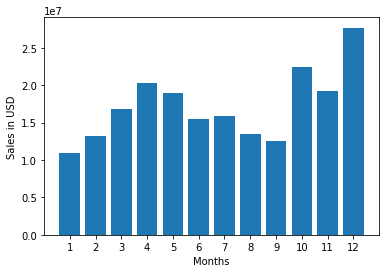

In [18]:
# lets plot this 

months = range(1,13)

plt.bar(months ,monthly_sales['Sales'] )
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

December was the best month for sales with approx. 1.3840M 

### Question2 : What city had the highest number of sales ?

In [19]:
# add city col 
def get_city(col):
    city = col.split(',')[1]
    return city 

# for same city names diff.countries let add state 

def get_state(col):
    state = col.split(',')[2].split(' ')[1]
    return state

df['City'] = df['Purchase Address'].apply(lambda x : f'{get_city(x)} ({get_state(x)})')


#df['City'] = df['Purchase Address'].apply(lambda x : x.split(',')[1])
# check 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [20]:
# lets groupby city to see highest no. of sales there 
city_highest = df.groupby('City').sum()

# .sort_values(by='Sales',ascending=False)
# as we see we have 2 portland cities diff. places 

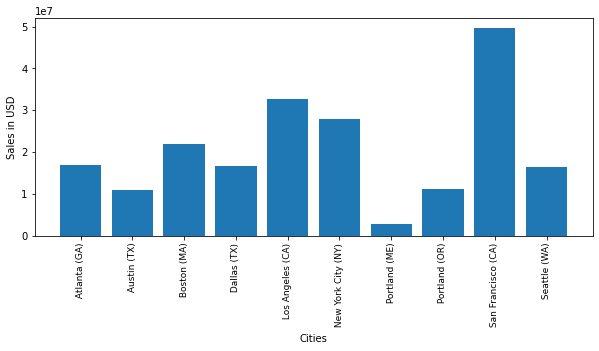

In [21]:
# lets plot this 

cities = [city for city , city_highest in df.groupby('City')]         # to get the same order as groupby method u should use list comp.
plt.figure(figsize=(10,4))
plt.bar( cities,city_highest['Sales'] )
plt.xticks(cities, rotation = 'vertical', size = 9)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

San Francisco (CA)	has the most sales 


In [22]:
# for this u can start asking urself why san Francisco has the most sales 
# is it cuzz the high standard of living ,is it cuz advertisements or is it cuz silicon valley there (hypothesis)

### Question 3 : What time should we dispaly ads to maximize  likelihood of customer's  buying product ?

In [23]:
# aggregate order dates (hour)  into dist. over 24 hours period 
# add col hour 
# convert order date to datetime data type 

df['Order Date'] = pd.to_datetime(df['Order Date'])

In [24]:
#check 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [25]:
df["Hour"] = df['Order Date'].dt.hour 
df["Minute"] = df['Order Date'].dt.minute


In [26]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [27]:
# aggregate WRT hour 
hourly_order = df.groupby('Hour').count()

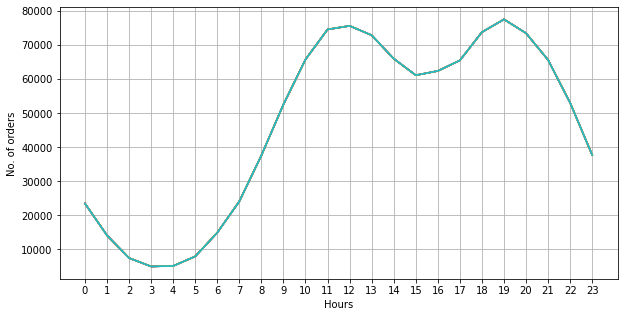

In [28]:
# lets plot this 

hours = [hour for hour, hourly_order in df.groupby('Hour') ]
plt.figure(figsize=(10,5))
plt.plot(hours, hourly_order)
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('No. of orders')
plt.show()

as we see we have 2 peaks , so before 11:00 AM  and before 7:00 PM

### Question 4: What products are most often sold together? 

In [29]:
# duplicated orderIDs can tell u which products were sold together
#false keeps all duplicates 

df = df[df['Order ID'].duplicated(keep = False)]

# add new cart col for same ID products 
df['Cart'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Cart
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones,Google Phone,Wir..."
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,"Wired Headphones,Wired Headphones,Wired Headph..."


In [30]:
# drop duplicated rows 

df = df[['Order ID','Cart']].drop_duplicates()
df.head()

,Order ID,Cart
0,176558,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,176559,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,"Wired Headphones,Wired Headphones,Wired Headph..."
6,176562,"USB-C Charging Cable,USB-C Charging Cable,USB-..."


In [31]:
# lets count pairs occurances 

from itertools import combinations  
# Return r length subsequences of elements from the input iterable.
from collections import Counter 
# dict subclass for counting hashable objects

count = Counter()

for row in df['Cart']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,3)))
    
for key,value in count.most_common(10):
    print(key, value)



('USB-C Charging Cable', 'USB-C Charging Cable', 'USB-C Charging Cable') 446700
('Lightning Charging Cable', 'Lightning Charging Cable', 'Lightning Charging Cable') 442880
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 421460
('AA Batteries (4-pack)', 'AA Batteries (4-pack)', 'AA Batteries (4-pack)') 417840
('Wired Headphones', 'Wired Headphones', 'Wired Headphones') 383940
('Apple Airpods Headphones', 'Apple Airpods Headphones', 'Apple Airpods Headphones') 315300
('Bose SoundSport Headphones', 'Bose SoundSport Headphones', 'Bose SoundSport Headphones') 271360
('27in FHD Monitor', '27in FHD Monitor', '27in FHD Monitor') 151760
('iPhone', 'iPhone', 'iPhone') 137200
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 125500


## Question 5: What product sold the most? Why do you think it did?

In [35]:
# lets groupby products 
quantity_ordered = df.groupby('Product').sum()['Price Each']

KeyError: 'Product'

In [ ]:
# lets plot this 

products = [product for product , quantity_ordered in df.groupby('Product')]         # to get the same order as groupby method u should use list comp.
plt.figure(figsize=(10,4))
plt.bar( products,quantity_ordered )
plt.xticks(cities, rotation = 'vertical', size = 9)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()

In [ ]:
# overlay this graph with actual prices of these products 
prices = df.groupyby('Product').mean()['Price Each']

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(products, quantity_ordered, 'g-')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices', color='b')

plt.show()

as we see when quantities go up prices go down and vis versa ...